In [1]:
#import packages
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
id                             693071 non-null object
timestamp                      693071 non-null float64
hour                           693071 non-null int64
day                            693071 non-null int64
month                          693071 non-null int64
datetime                       693071 non-null object
timezone                       693071 non-null object
source                         693071 non-null object
destination                    693071 non-null object
cab_type                       693071 non-null object
product_id                     693071 non-null object
name                           693071 non-null object
price                          637976 non-null float64
distance                       693071 non-null float64
surge_multiplier               693071 non-null float64
latitude                       693071 non-null float64
longitude              

In [ ]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Text(0.5, 1.0, 'Prices during the day')

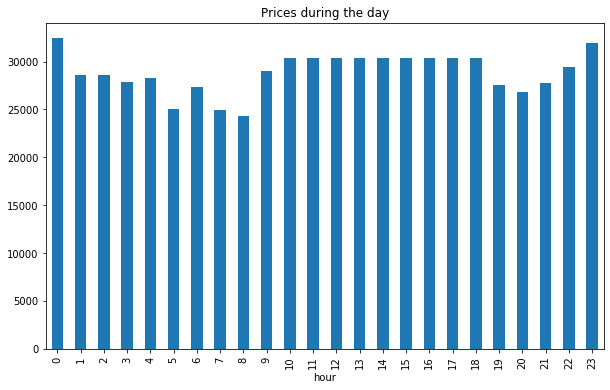

In [ ]:
plt.figure(figsize =(10,6))
df.groupby(['hour']).size().plot.bar()
plt.title('Prices during the day')

### From the above plot we can absorb that the prices spike late at night around 11 pm, the highest surge at 12 am, the prices are constant between 11 am and 6 pm.

Text(0.5, 1.0, 'Prices in a month')

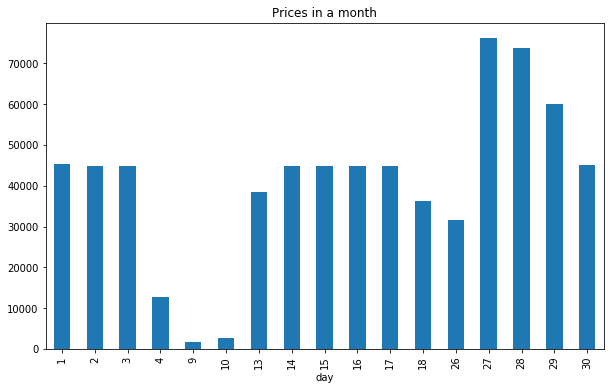

In [ ]:
plt.figure(figsize =(10,6))
df.groupby(['day']).size().plot.bar()
plt.title('Prices in a month')

## From the above plot we can observe that the prices remain constant at the beginning of the month and surges at the nearing of the end and finally takes a dip.

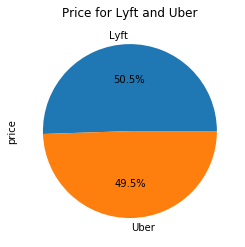

In [ ]:
df.groupby(['cab_type']).sum().plot(kind='pie', y='price',title="Price for Lyft and Uber", legend=False,
                   autopct='%1.1f%%')

Text(0.5, 1.0, 'Prices during November and December')

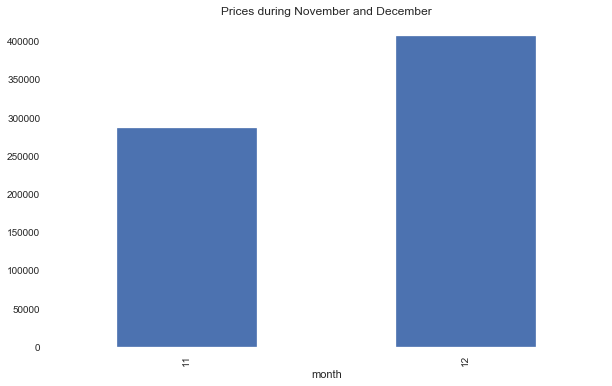

In [ ]:
plt.figure(figsize =(10,6))
df.groupby(['month']).size().plot.bar()
plt.title('Prices during November and December')

In [3]:
df_sample = df.sample(frac=.0101, random_state=3)               # 1.01% sample

In [4]:
df_sample.shape

(7000, 57)

In [5]:
df_sample = df_sample.drop(columns=['id', 'timestamp', 'hour', 'day', 'month', 'timezone', 'product_id', 'long_summary', 'apparentTemperature', 'windGust', 'windGustTime', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime','visibility.1', 'windBearing', 'pressure','uvIndex', 'ozone',
       'sunriseTime', 'sunsetTime', 'short_summary'])

In [ ]:
df_sample.shape

(7000, 18)

In [ ]:
df_sample.columns

Index(['datetime', 'source', 'destination', 'cab_type', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'visibility', 'dewPoint', 'cloudCover'],
      dtype='object')

In [ ]:
df_sample['source'].unique()

array(['Northeastern University', 'South Station', 'Back Bay', 'Fenway',
       'Financial District', 'North End', 'Haymarket Square', 'West End',
       'Boston University', 'Beacon Hill', 'North Station',
       'Theatre District'], dtype=object)

In [6]:
s = pd.get_dummies(df_sample.source)

In [7]:
df_sample = pd.concat([df_sample, s], axis=1)

In [8]:
df_sample['destination'].unique()

array(['Theatre District', 'Beacon Hill', 'North End', 'Back Bay',
       'Financial District', 'South Station', 'North Station',
       'Northeastern University', 'Fenway', 'Haymarket Square',
       'West End', 'Boston University'], dtype=object)

In [9]:
d = pd.get_dummies(df_sample.destination)

In [10]:
df_sample = pd.concat([df_sample, d], axis=1)

In [11]:
cab = pd.get_dummies(df_sample.cab_type)

In [12]:
df_sample = pd.concat([df_sample, cab], axis=1)

In [13]:
name = pd.get_dummies(df_sample.name)

In [14]:
df_sample = pd.concat([df_sample, name], axis=1)

In [ ]:
df_sample.isna().sum()

datetime                     0
source                       0
destination                  0
cab_type                     0
name                         0
price                      574
distance                     0
surge_multiplier             0
latitude                     0
longitude                    0
temperature                  0
precipIntensity              0
precipProbability            0
humidity                     0
windSpeed                    0
visibility                   0
dewPoint                     0
cloudCover                   0
Back Bay                     0
Beacon Hill                  0
Boston University            0
Fenway                       0
Financial District           0
Haymarket Square             0
North End                    0
North Station                0
Northeastern University      0
South Station                0
Theatre District             0
West End                     0
Back Bay                     0
Beacon Hill                  0
Boston U

In [15]:
df_sample['datetime']= pd.to_datetime(df_sample['datetime'])
df_sample['hour']= df_sample['datetime'].dt.hour
df_sample['year']= df_sample['datetime'].dt.year
df_sample['month']= df_sample['datetime'].dt.month
df_sample['week']= df_sample['datetime'].dt.week
df_sample['day']= df_sample['datetime'].dt.day
df_sample['quarter']= df_sample['datetime'].dt.quarter
df_sample['time_zone']= df_sample['datetime'].dt.tz
df_sample['time']= df_sample['datetime'].dt.time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
df_sample.groupby(['year']).size()

year
2018    7000
dtype: int64

In [16]:
day = pd.get_dummies(df_sample.day)

In [17]:
df_sample = pd.concat([df_sample, day], axis=1)

In [18]:
df_sample =df_sample.drop(columns= ['day','datetime', 'time_zone', 'quarter', 'week', 'time', 'year','source', 'destination', 'cab_type', 'name'])

In [ ]:
df_sample.shape

(7000, 71)

In [19]:
df1= df_sample.dropna(axis=0)

In [ ]:
df1.shape

(6426, 71)

In [ ]:
df1.isna().sum()

price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
                   ..
26                  0
27                  0
28                  0
29                  0
30                  0
Length: 71, dtype: int64

In [ ]:
df1.shape

(6426, 71)

In [ ]:

df1.corr()

,price,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,dewPoint,cloudCover,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End,Lyft,Uber,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV,hour,month,1,2,3,4,9,10,13,14,15,16,17,18,26,27,28,29,30
price,1.000000,0.354020,0.249711,0.000975,-0.008379,0.010817,-0.013070,-0.023818,-0.026528,0.009236,0.021351,-0.006208,-0.002122,-0.024102,-0.043727,0.084631,0.066937,0.027912,-0.098924,-0.040547,0.012907,0.068340,-0.035462,0.017779,-0.036669,-0.000989,-0.008120,0.083767,0.058439,0.043165,-0.077754,-0.053411,0.004975,0.008431,-0.058690,0.004495,0.000210,0.072595,-0.072595,0.119863,0.464979,0.033477,0.196291,0.502144,-0.213420,-0.045916,-0.336393,NaN,-0.260633,-0.221911,-0.032403,-0.216585,0.034770,-0.008637,-0.013284,-0.010905,0.023198,-0.008427,0.022508,-0.013973,0.011144,-0.000569,0.000434,-0.009944,-0.008113,-0.003798,-0.015044,0.017438,0.009113,-0.006740,0.004142
distance,0.354020,1.000000,0.032252,-0.016682,0.017955,-0.008565,0.007394,-0.005563,-0.007443,-0.003619,0.004314,-0.010078,0.001760,-0.048474,-0.045648,0.229279,0.171898,0.119245,-0.281747,-0.157134,0.008132,0.149964,-0.084694,-0.047032,-0.019438,-0.024100,0.004686,0.191587,0.188576,0.122887,-0.230728,-0.132645,0.008003,0.121135,-0.149723,-0.071333,-0.017837,-0.009938,0.009938,-0.019035,0.018434,-0.008691,-0.008917,0.016509,0.007386,-0.013995,-0.010603,NaN,-0.010047,0.005009,0.016433,0.006694,0.007971,0.005036,-0.005706,0.021874,0.011261,-0.011224,0.003141,0.013085,0.006051,-0.013835,0.002565,-0.017983,0.001075,0.008556,-0.000655,-0.014674,0.012615,-0.016144,0.012185
surge_multiplier,0.249711,0.032252,1.000000,0.005813,0.001813,-0.015230,0.009774,0.006391,-0.014501,0.021756,0.006606,-0.018233,0.007502,0.022961,-0.014637,0.036173,0.036991,-0.024354,-0.045026,-0.040492,-0.025444,0.021682,-0.005083,0.066419,-0.029208,0.015547,-0.010765,0.018227,-0.011725,-0.008991,0.005665,0.004632,0.010911,-0.007457,-0.013698,-0.004094,0.002159,0.166939,-0.166939,-0.049683,-0.050481,0.066768,0.045980,0.089876,0.073264,0.081097,-0.046646,NaN,-0.048685,-0.048971,-0.048589,-0.047915,0.017052,0.006090,-0.007078,0.004138,-0.009267,0.000222,0.025022,-0.010640,0.021843,-0.005026,-0.003956,-0.010253,0.001768,0.020606,-0.013280,0.010266,0.003595,-0.008359,-0.009360
latitude,0.000975,-0.016682,0.005813,1.000000,-0.533126,-0.091999,-0.057204,-0.065947,-0.108651,-0.102681,0.118948,-0.120057,-0.059009,0.010002,0.006872,-0.030631,-0.010127,-0.000456,-0.038111,0.001773,0.002226,0.004481,0.030783,0.006329,0.017687,-0.005877,-0.001625,0.000860,0.022985,-0.015068,0.011793,0.008904,-0.007577,-0.010073,0.007572,-0.006449,-0.005478,0.009209,-0.009209,-0.015646,0.003622,-0.000812,0.001951,0.003623,0.021979,-0.000859,-0.008624,NaN,-0.009861,-0.008995,0.019784,-0.005082,0.006088,0.078311,-0.030776,-0.031325,-0.119484,-0.043693,0.012257,-0.035068,0.093209,0.096828,0.094296,0.077914,-0.065366,0.078736,0.001295,-0.057624,0.005838,-0.062176,-0.020949
longitude,-0.008379,0.017955,0.001813,-0.533126,1.000000,0.013189,0.126085,0.121227,0.079422,0.079322,-0.086752,0.050622,0.057777,-0.001045,-0.014431,0.037136,-0.000275,-0.002956,0.003766,-0.002930,-0.021997,0.013016,-0.012413,-0.005113,0.006149,0.022321,0.015657,-0.015141,-0.019796,0.002414,-0.005491,-0.018187,-0.009853,0.017422,0.002787,0.003115,0.004631,0.002286,-0.002286,-0.010366,-0.005237,-0.004348,-0.009606,0.001339,0.002663,-0.002025,0.016092,NaN,0.000563,0.005050,-0.000327,0.006655,-0.006014,-0.121470,0.020863,-0.012120,0.035644,-0.084039,-0.036144,0.021675,-0.044760,-0.016682,-0.068837,-0.085580,0.033497,-0.067278,0.0

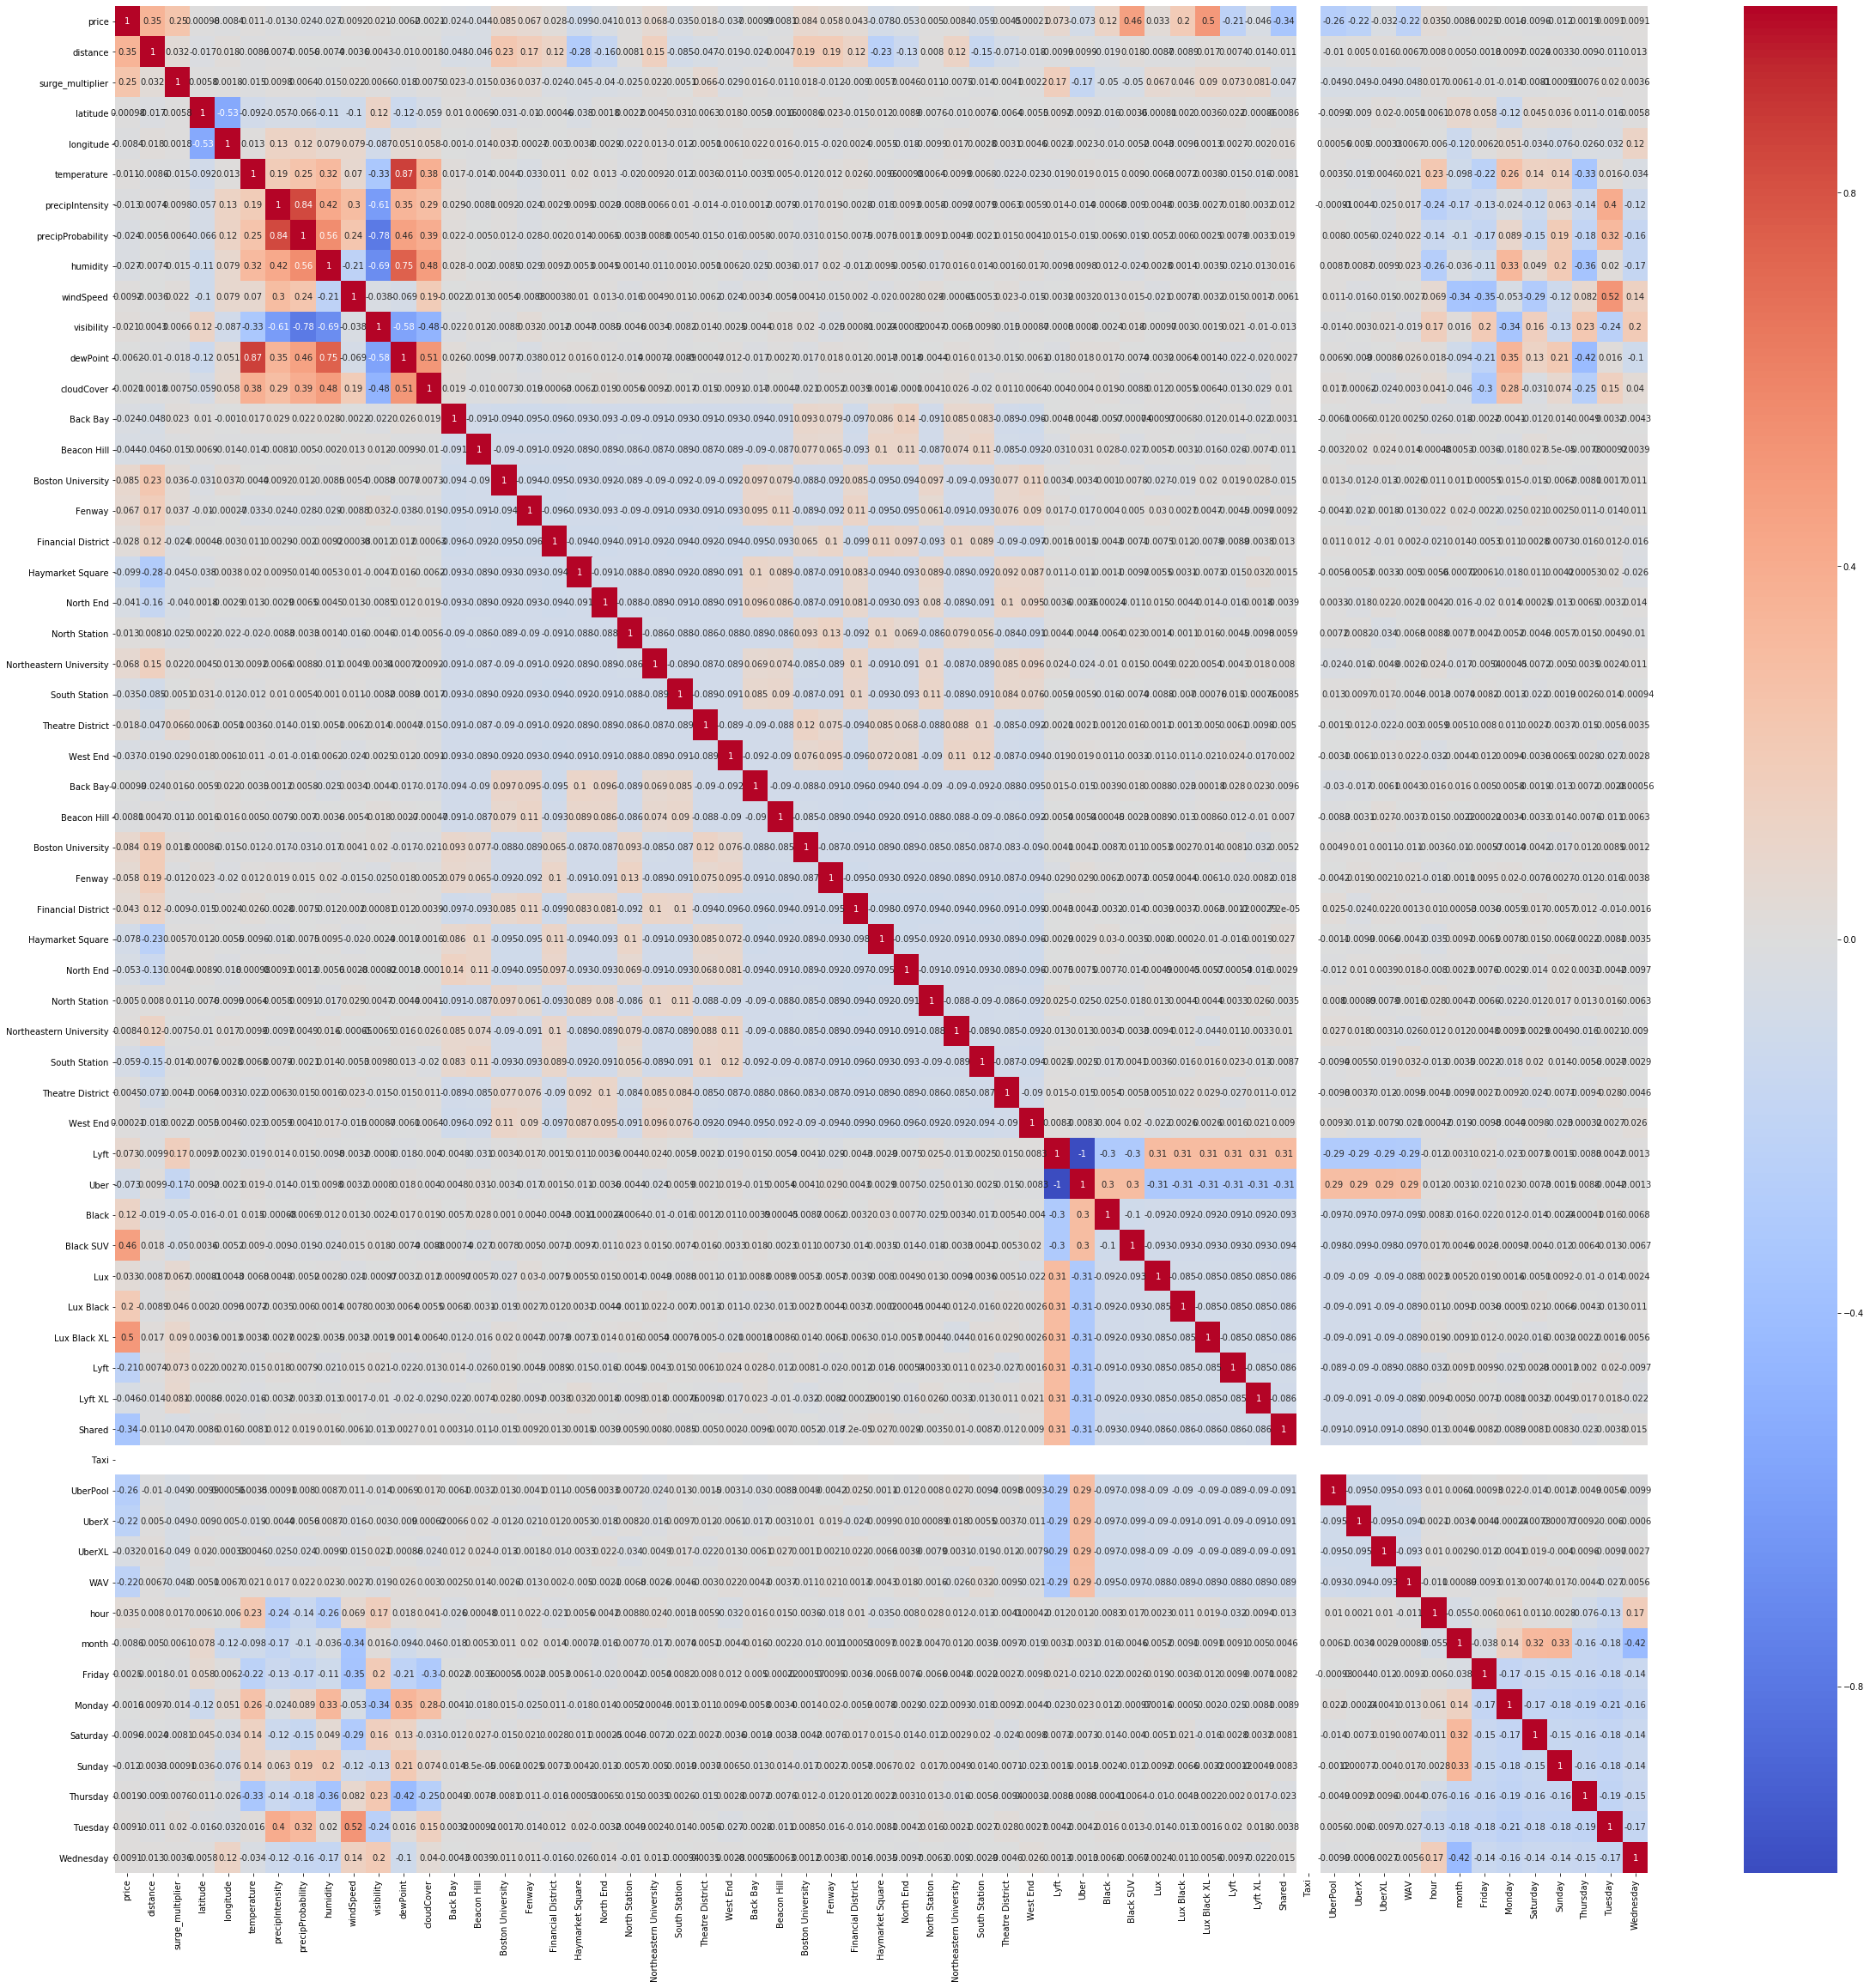

In [ ]:
cr = df1.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data=cr, xticklabels=cr.columns, yticklabels=cr.columns, annot = True, cmap = 'coolwarm', ax=ax)

#### Here we see that these columns are highly correlated to each other, so we drop some of them to reduce bias in the data.

In [20]:
df1 =df1.drop(columns= ['latitude','longitude','dewPoint','visibility','precipIntensity','precipProbability'])

### Regression: Data Prep

In [21]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [22]:
# split sample data
train , test = train_test_split(df1, test_size = 0.3)
# create train data
x_train = train.drop('price', axis=1)
y_train = train['price']
# create test data
x_test = test.drop('price', axis = 1)
y_test = test['price']

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the features
x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(x_test_scaled)


In [24]:
# for storing performance details of all models
all_models = {'Model':[],'RMSE Score':[]}

### Regression: KNN Regressor

In [ ]:
rmse_val = []                                                # to store rmse values for different k
train_score_array = []
test_score_array = []
for K in range(1,20):
    knn_R = KNeighborsRegressor(K)
    knn_R.fit(X_train, y_train)                               # fit the model

    pred=knn_R.predict(X_test)                                # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred))             # calculate rmse
    rmse_val.append(error)                                    # store rmse values

    train_score_array.append(knn_R.score(X_train, y_train))   # calc train score
    test_score_array.append(knn_R.score(X_test, y_test))      # calc test score

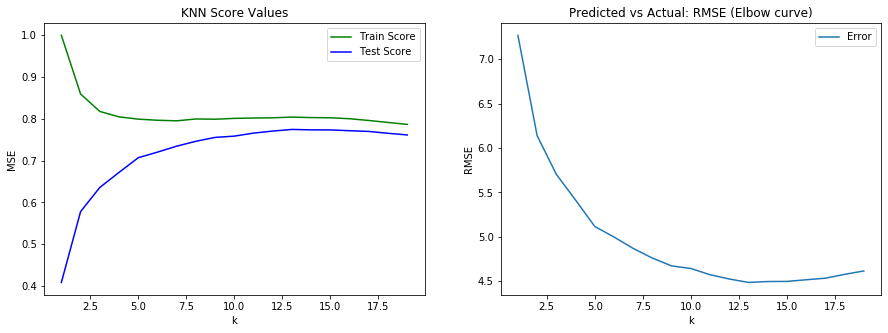

In [ ]:
# plotting KNN score values and Elbow curve
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
        plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
        plt.legend()
        plt.xlabel('k')
        plt.ylabel('MSE')
        plt.title('KNN Score Values')
    if i == 2:
        plt.plot(x_axis,rmse_val, label='Error')
        plt.legend()
        plt.xlabel('k')
        plt.ylabel('RMSE')
        plt.title('Predicted vs Actual: RMSE (Elbow curve)')

### Regression: KNN Regressor: GridSearchCV

In [ ]:
params = {'n_neighbors': range(1,20)}
knn_R = KNeighborsRegressor()

best_KnnR = GridSearchCV(knn_R, params, cv=5)
best_KnnR.fit(X_train,y_train)
k = best_KnnR.best_params_['n_neighbors']

# all_models['Model'].append('KNN Regression')
# all_models['Cross Validation Score'].append(best_KnnR.best_score_)

In [ ]:
print('KNN Regression')
print('Best K: %d' % k)
print('Train Score: %.4f' % best_KnnR.score(X_train, y_train))
print('Test Score: %.4f' % best_KnnR.score(X_test, y_test))
print('Cross Validation Score: %.4f' % best_KnnR.best_score_)

KNN Regression
Best K: 12
Train Score: 0.8026
Test Score: 0.7709
Cross Validation Score: 0.7587


### Regression: KNN Regressor: Cross Validation

In [ ]:
MSEs = cross_val_score(knn_R, X_train, y_train, cv=5)
mean_MSE = np.mean(MSEs)
print('Average Cross Validation Score: %.4f' % mean_MSE)

Average Cross Validation Score: 0.7048


#### Best Model for KNNRegressor with n = 12

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
best_knn = KNeighborsRegressor(n_neighbors = 12)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print('Train score: {:.4f}%'.format(best_knn.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_knn.score(X_test, y_test)*100))
#all_models['Model'].append('KNN Regression')
#all_models['Cross Validation Score'].append(best_knn.score)


Train score: 81.0762%
Test score: 77.5444%


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
knn_rmse = mean_squared_error(y_test,best_knn.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_knn.predict(X_test))))

RMSE : 20.33


In [ ]:
all_models['Model'].append('KNN Regression')

all_models['RMSE Score'].append(knn_rmse)

### Regression: Linear Regression

### Regression: Linear: Grid Search & Cross Validation

In [ ]:
lin_R = LinearRegression()
parameters = {'normalize':[True,False]}

# grid search
best_linR = GridSearchCV(lin_R,parameters, cv=6, return_train_score=True)
best_linR.fit(X_train, y_train)
print("Best parameters: {}".format(best_linR.best_params_))
print("Best cross-validation score: {:.4f}".format(best_linR.best_score_))

# cross validation
MSEs = cross_val_score(lin_R, X_train, y_train, cv=5)
mean_MSE = np.mean(MSEs)
print('Average Cross Validation Score: %.4f' % mean_MSE)

Best parameters: {'normalize': False}
Best cross-validation score: 0.9278
Average Cross Validation Score: 0.9275


In [ ]:
# linear regression on all attributes
lin_R = LinearRegression(normalize = False)
lin_R.fit(X_train, y_train)
print('Train Score: %.4f' % lin_R.score(X_train, y_train))
print('Test Score: %.4f' %lin_R.score(X_test, y_test))


Train Score: 0.9301
Test Score: 0.9289


In [ ]:
linear_rmse = mean_squared_error(y_test,best_linR.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_linR.predict(X_test))))

RMSE : 6.44


In [ ]:
all_models['Model'].append('Linear Regression')

all_models['RMSE Score'].append(linear_rmse)

### Regression: Ridge

In [ ]:
x_range0 = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

# check ridge scores for different values of alpha

for alpha in x_range0: 
    rid_R = Ridge(alpha)
    rid_R.fit(X_train,y_train)
    train_score_list.append(rid_R.score(X_train,y_train))
    test_score_list.append(rid_R.score(X_test, y_test))

In [ ]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

# feature response to varying alpha

for alpha in x_range: 
    rid_R = Ridge(alpha)
    rid_R.fit(X_train,y_train)
    coeff.append(rid_R.coef_ )
    
coeff = np.array(coeff)

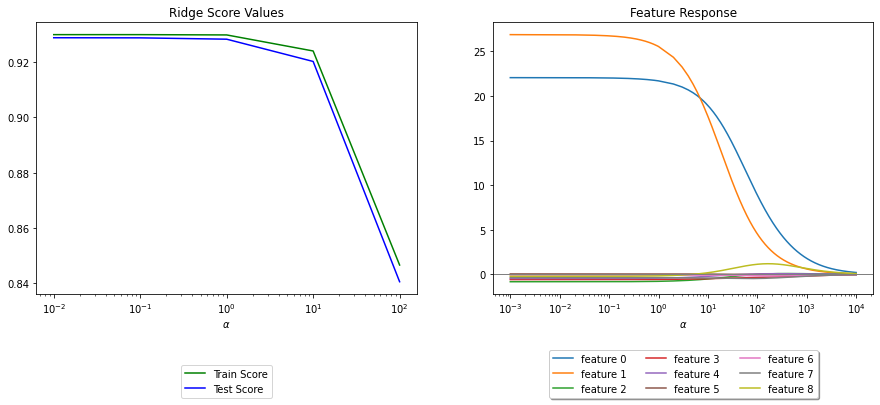

In [ ]:
# plotting Ridge score values and Feature response

fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_range0, train_score_list, c = 'g', label = 'Train Score')
        plt.plot(x_range0, test_score_list, c = 'b', label = 'Test Score')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
        plt.xlabel(r'$\alpha$')
        plt.title('Ridge Score Values')
    if i == 2:
        for i in range(0,9):
            plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
        plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
        plt.xlabel(r'$\alpha$')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fancybox=True, shadow=True)
        plt.title('Feature Response')

### Regression: Ridge: GridSearchCV & Cross Validation

In [ ]:
rid_R = Ridge()
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
best_ridR = GridSearchCV(rid_R, params, cv=5)
best_ridR.fit(X_train, y_train)
print('Best Alpha: %.3f' % best_ridR.best_params_['alpha'])
print('Best Score: %.4f' % best_ridR.best_score_)


Best Alpha: 0.100
Best Score: 0.9275


In [ ]:
best_ridge = Ridge(alpha = 0.1)
best_ridge.fit(X_train,y_train)
print('Train Score: %.4f' % best_ridge.score(X_train, y_train))
print('Test Score: %.4f' % best_ridge.score(X_test, y_test))


Train Score: 0.9301
Test Score: 0.9289


In [ ]:
ridge_rmse = mean_squared_error(y_test,best_ridge.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_ridge.predict(X_test))))

RMSE : 6.44


In [ ]:
all_models['Model'].append('Ridge Regression')

all_models['RMSE Score'].append(ridge_rmse)

### Regression: Lasso

In [ ]:
x_range0 = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

# check ridge scores for different values of alpha

for alpha in x_range0: 
    las_R = Lasso(alpha)
    las_R.fit(X_train,y_train)
    train_score_list.append(las_R.score(X_train,y_train))
    test_score_list.append(las_R.score(X_test, y_test))

In [ ]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

# feature response to varying alpha

for alpha in x_range: 
    las_R = Lasso(alpha)
    las_R.fit(X_train,y_train)
    coeff.append(las_R.coef_ )

coeff = np.array(coeff)

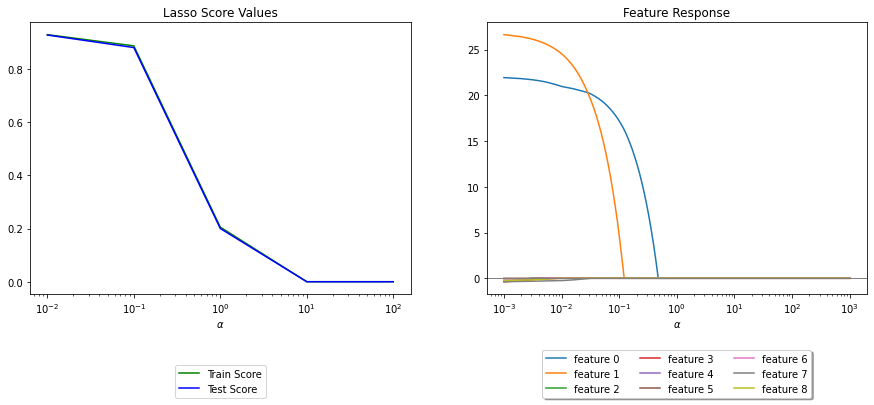

In [ ]:
# plotting Lasso score values and Feature response

fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_range0, train_score_list, c = 'g', label = 'Train Score')
        plt.plot(x_range0, test_score_list, c = 'b', label = 'Test Score')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
        plt.xlabel(r'$\alpha$')
        plt.title('Lasso Score Values')
    if i == 2:
        for i in range(0,9):
            plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
        plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
        plt.xlabel(r'$\alpha$')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fancybox=True, shadow=True)
        plt.title('Feature Response')

### Regression: Lasso: GridSearchCV & Cross Validation

In [ ]:
las_R = Lasso()
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
best_lasR = GridSearchCV(las_R, params, cv=5)
best_lasR.fit(X_train, y_train)
print('Best Alpha: %.3f' % best_lasR.best_params_['alpha'])
print('Best Score: %.4f' % best_lasR.best_score_)


Best Alpha: 0.010
Best Score: 0.9277


In [ ]:
best_lasso = Lasso(alpha = 0.010)
best_lasso.fit(X_train,y_train)
print('Train Score: %.4f' % best_lasso.score(X_train, y_train))
print('Test Score: %.4f' % best_lasso.score(X_test, y_test))


Train Score: 0.9290
Test Score: 0.9275


In [ ]:
lasso_rmse = mean_squared_error(y_test,best_lasso.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_lasso.predict(X_test))))

RMSE : 6.57


In [ ]:
all_models['Model'].append('Lasso Regression')

all_models['RMSE Score'].append(lasso_rmse)

### Regression: Polynomial Regression
#### (with GridSearchCV & Cross Validation)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#apply polynomial regression in pipeline
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())  
])

# grid search till degree 5
param_poly = {'polynomialfeatures__degree':range(1,5)}
best_polR = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True)
best_polR.fit(X_train, y_train)

# model predictions
y_train_pred = best_polR.predict(X_train)
y_test_pred = best_polR.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  FitFailedWarning)


In [ ]:
# check model performance:
print('Train:')
print('MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2: {}'.format(r2_score(y_train, y_train_pred)))
print('Test')
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2: {}'.format(r2_score(y_test, y_test_pred)))
# find best parameters
print('Best parameters: ')
print(best_polR.best_params_)
# cross validation
print("Cross Validation training results", best_polR.cv_results_['mean_train_score'])
print("Cross Validation testing results", best_polR.cv_results_['mean_test_score'])

### Regression: SVM: Simple
#### ( with GridSearchCV & Cross Validation) 

In [ ]:
parms_svr = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

# grid search for best parameters
svr_R = LinearSVR()
best_svrR = GridSearchCV(estimator = svr_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1, cv=10)
best_svrR.fit(X_train, y_train)
result_svr = pd.DataFrame(best_svrR.cv_results_)

# simple SVM with best parameters
svr_R = LinearSVR(C = best_svrR.best_params_['C'], epsilon = best_svrR.best_params_['epsilon'])
svr_R.fit(X_train, y_train)

# cross validation matrix
kfold = KFold(n_splits=10)
scores = cross_val_score(svr_R, X_train, y_train, cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
print('Best Model:')
print('Parameters: {}'.format(best_svrR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrR.best_score_))
print('Train Score: %.4f' % svr_R.score(X_train, y_train))
print('Test Score: %.4f' % svr_R.score(X_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 10, 'epsilon': 1}
Cross-validation score: 0.9265
Train Score: 0.9282
Test Score: 0.9264
Average Cross Validation: 0.9265


Text(0.5, 0, 'Alpha')

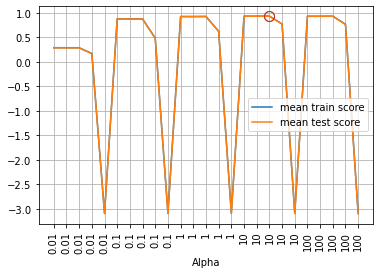

In [ ]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrR.best_index_], result_svr['mean_train_score'][best_svrR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrR.best_index_], result_svr['mean_test_score'][best_svrR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

In [ ]:
best_svr = LinearSVR(C= 10, epsilon= 1)
best_svr.fit(X_train,y_train)
print('Train Score: %.4f' % best_svr.score(X_train, y_train))
print('Test Score: %.4f' % best_svr.score(X_test, y_test))


Train Score: 0.9280
Test Score: 0.9261


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svr_rmse =mean_squared_error(y_test,best_svr.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_svr.predict(X_test))))

RMSE : 6.69


In [ ]:
all_models['Model'].append('Simple SVR Regression')

all_models['RMSE Score'].append(svr_rmse)

### Regression: SVM: Linear
#### ( with GridSearchCV & Cross Validation)

In [ ]:
parms_svr = {'C': [0.01,0.1, 1, 10, 100]}

# grid search for best parameters
svrL_R = SVR(kernel='linear')
best_svrLR = GridSearchCV(estimator = svrL_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=6)
best_svrLR.fit(X_train,y_train)
result_svr = pd.DataFrame(best_svrLR.cv_results_)

# simple SVM with best parameters
svrL_R = SVR(kernel = 'linear',C = best_svrLR.best_params_['C'])
svrL_R.fit(X_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrL_R, X_train, y_train, cv=kfold)

In [ ]:
print('Best Model:')
print('Parameters: {}'.format(best_svrLR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrLR.best_score_))
print('Train Score: %.4f' % svrL_R.score(X_train, y_train))
print('Test Score: %.4f' % svrL_R.score(X_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 100}
Cross-validation score: 0.9253
Train Score: 0.9271
Test Score: 0.9258
Average Cross Validation: 0.9253


Text(0.5, 0, 'C')

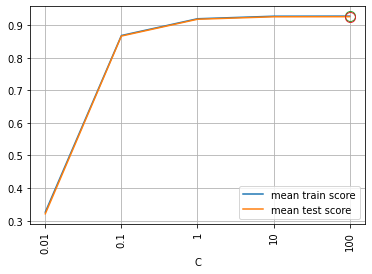

In [ ]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrLR.best_index_], result_svr['mean_train_score'][best_svrLR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrLR.best_index_], result_svr['mean_test_score'][best_svrLR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

In [ ]:
best_svr_L = SVR(C = 100, kernel='linear')
best_svr_L.fit(X_train,y_train)
print('Train Score: %.4f' % best_svr_L.score(X_train, y_train))
print('Test Score: %.4f' % best_svr_L.score(X_test, y_test))


Train Score: 0.9271
Test Score: 0.9258


In [ ]:
svr_L_rmse = mean_squared_error(y_test,best_svr_L.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_svr_L.predict(X_test))))

RMSE : 6.72


In [ ]:
all_models['Model'].append('Linear SVR Regression')

all_models['RMSE Score'].append(svr_L_rmse)

### Regression: SVM: RBF
#### (with GridSearchCV & Cross Validation)

In [ ]:
parms_svr = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

# grid search for best parameters
svrR_R = SVR(kernel='rbf')
best_svrRR = GridSearchCV(estimator = svrR_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=3)
best_svrRR.fit(X_train,y_train)
result_svr = pd.DataFrame(best_svrRR.cv_results_)

# simple SVM with best parameters
svrR_R = SVR(kernel = 'rbf',C = best_svrRR.best_params_['C'], gamma = best_svrRR.best_params_['gamma'])
svrR_R.fit(X_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrR_R, X_train, y_train, cv=kfold)

In [ ]:
print('Best Model:')
print('Parameters: {}'.format(best_svrRR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrRR.best_score_))
print('Train Score: %.4f' % svrR_R.score(X_train, y_train))
print('Test Score: %.4f' % svrR_R.score(X_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 100, 'gamma': 0.1}
Cross-validation score: 0.9407
Train Score: 0.9871
Test Score: 0.9459
Average Cross Validation: 0.9447


Text(0.5, 0, 'C')

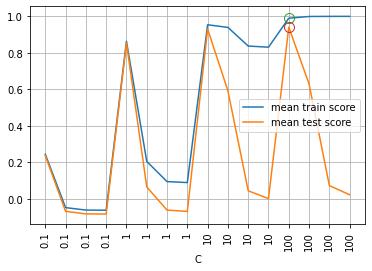

In [ ]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrRR.best_index_], result_svr['mean_train_score'][best_svrRR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrRR.best_index_], result_svr['mean_test_score'][best_svrRR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

In [ ]:
best_svr_R = SVR(C = 100, gamma= 0.1, kernel='rbf')
best_svr_R.fit(X_train,y_train)
print('Train Score: %.4f' % best_svr_R.score(X_train, y_train))
print('Test Score: %.4f' % best_svr_R.score(X_test, y_test))

Train Score: 0.9871
Test Score: 0.9459


In [ ]:
svr_R_rmse = mean_squared_error(y_test,best_svr_R.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_svr_R.predict(X_test))))

RMSE : 4.90


In [ ]:
all_models['Model'].append('RBF SVR Regression')

all_models['RMSE Score'].append(svr_R_rmse)

### Regression: SVM: Poly
#### (with GridSearchCV & Cross Validation)

In [ ]:
parms_svr = {'C': [1, 10, 100,1000,10000],'degree':[1,3]}

# grid search for best parameters
svrP_R = SVR(kernel='poly')
best_svrPR = GridSearchCV(estimator = svrP_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=3)
best_svrPR.fit(X_train,y_train)
result_svr = pd.DataFrame(best_svrPR.cv_results_)

# simple SVM with best parameters
svrP_R = SVR(kernel = 'linear',C = best_svrPR.best_params_['C'])
svrP_R.fit(X_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrP_R, X_train, y_train, cv=kfold)

In [ ]:
print('Best Model:')
print('Parameters: {}'.format(best_svrPR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrPR.best_score_))
print('Train Score: %.4f' % svrP_R.score(X_train, y_train))
print('Test Score: %.4f' % svrP_R.score(X_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 10, 'degree': 3}
Cross-validation score: 0.9360
Train Score: 0.9267
Test Score: 0.9250
Average Cross Validation: 0.9251


Text(0.5, 0, 'C')

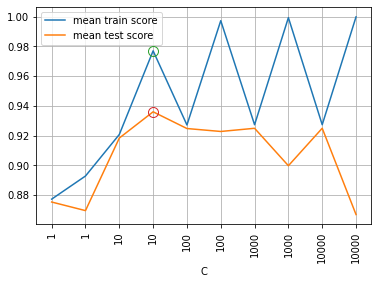

In [ ]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrPR.best_index_], result_svr['mean_train_score'][best_svrPR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrPR.best_index_], result_svr['mean_test_score'][best_svrPR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

In [ ]:
best_svr_P = SVR(C = 10, degree= 3, kernel='poly')
best_svr_P.fit(X_train,y_train)
print('Train Score: %.4f' % best_svr_P.score(X_train, y_train))
print('Test Score: %.4f' % best_svr_P.score(X_test, y_test))

Train Score: 0.9760
Test Score: 0.9376


In [ ]:
svr_P_rmse = mean_squared_error(y_test,best_svr_P.predict(X_test))
print("RMSE : {:.2f}".format(mean_squared_error(y_test,best_svr_P.predict(X_test))))

RMSE : 5.65


In [ ]:
all_models['Model'].append('Poly SVR Regression')

all_models['RMSE Score'].append(svr_P_rmse)

### Best Model: Selection

In [ ]:
model_df = pd.DataFrame(data = all_models)
model_df

,Model,RMSE Score
0,KNN Regression,20.331367
1,Linear Regression,6.435016
2,Ridge Regression,6.438583
3,Poly SVR Regression,5.651814
4,RBF SVR Regression,4.900064
5,Linear SVR Regression,6.719886
6,Simple SVR Regression,6.693472
7,Lasso Regression,6.568266


In [ ]:
# selecting best model with maximum score 
best_model = model_df.loc[model_df['RMSE Score'].idxmin()]
best_model

Model         RBF SVR Regression
RMSE Score               4.90006
Name: 4, dtype: object

# REGRESSION SUMMARY
### From the table above we can conclude that looking at the rmse columns of the summary dataframe the least RMSE score is obtained from the RBF SVR. Hence I would use it to determine any predictions on the data.

